# ACBD6 and NEDPM Syndrome

[Neurodevelopmental Disorder with Progressive Movement Abnormalities (NEDPM)](https://www.omim.org/entry/620785) is an autosomal recessive complex neurologic disorder characterized by global developmental delay apparent from infancy, moderately to severely impaired intellectual development, poor or absent speech, behavioral abnormalities, and various hyperkinetic movement disorders, including dystonia, spasticity, and cerebellar ataxia, that interfere with gait and cause a stooped posture. NEDPM is caused by pathogenic variants in the [ACBD6](https://www.omim.org/entry/616352?search=acbd6&highlight=acbd6) gene.

One previous publication  reported candidate genotype-phenotype correlations in NEDPM.

[Kaiyrzhanov et al. (2024)](https://pubmed.ncbi.nlm.nih.gov/37951597/) investigating 45 individuals stated that:

1. **Type of Mutation and Severity:**
   - **Most Severe:**
     - Frameshift Mutations: Often lead to the production of a truncated, non-functional protein, which can have a significant impact on disease severity. For example:
       - c.474delA, p.(Asp159ThrfsTer16) results in a frameshift and a premature termination signal, leading to loss of normal protein function.
       - c.360dupA, p.(Leu121ThrfsTer27), another frameshift mutation, likely results in similar severe outcomes due to premature truncation of the protein.
   - **Least Severe:**
     - Missense Mutations: These mutations change a single amino acid in the protein, which might still retain partial function or have a less drastic effect on the protein structure and function. For example:
       - c.602A>G, p.(Asp201Gly) might lead to a functional protein with altered properties, possibly contributing to a less severe phenotype compared to truncating mutations.

2. **Zygosity and Phenotype Expressivity:**
   - **Homozygous Mutations:** Individuals with homozygous mutations often show more severe and comprehensive symptomatology due to the lack of a wild-type allele. This was evident across several cases where more severe developmental and neurological defects were noted in homozygous individuals compared to those with other forms of genetic modifications.
   - **Compound Heterozygous:** While specific details weren’t highlighted for compound heterozygotes in the document, typically, individuals with one copy of two different mutations can also exhibit significant symptoms, depending on the nature of each mutation.

3. **Mutation Location:**
   - **Most Severe:**
     - Splice Site Mutations: These mutations affect the normal splicing of the mRNA, often leading to significant disruptions in protein structure and function. For example:
       - c.574-2A>G affects a splice acceptor site, likely leading to abnormal mRNA splicing and a significantly dysfunctional protein.
       - c.664-2A>G and c.694+1G>A are other examples where splice site mutations lead to skipping of exon 7, which drastically alters the protein structure.
   - **Least Severe:**
     - Exonic Mutations not Affecting Splicing or Leading to Missense Variants: These mutations, especially if they occur in less critical regions of the protein or result in conservative amino acid changes, may be associated with milder effects. The specific examples of less impactful exonic mutations weren’t detailed in the summary, but typically, these would not disrupt the fundamental structure or critical functions of the protein.


Based on the findings from Kaiyrzhanov et al. (2024), we will perform the following analyses to reproduce the genotype-phenotype correlations:

1. **Compare Missense vs. Other Variants:**
   - We will categorize the variants in our dataset into missense and other variants (nonsense, frameshift, and inframe indels) and analyze the distribution and severity of phenotypic features.

2. **Zygosity Analysis:**
   - We will compare the phenotypic expressivity between individuals with homozygous mutations and those with compound heterozygous mutations.

3. **Mutation Location Analysis:**
   - We will investigate the impact of splice site mutations versus exonic mutations not affecting splicing on the severity of the phenotype.

4. **Test the Two Most Common Missense Variants:**
   - We will identify and analyze the two most common missense variants in our dataset to assess their correlation with specific phenotypic features.



## Imports 

In [25]:
import gpsea
import hpotk
from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.4.1.dev0


## Loading Phenopackets & Gene Variant Data

In [26]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
cohort_name = "ACBD6"
with phenopacket_registry.open_phenopacket_store('0.1.18') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))
print(f"Imported {len(phenopackets)} phenopackets from cohort {cohort_name}")

Imported 45 phenopackets from cohort ACBD6


Validated under none policy
No errors or warnings were found


## Define Configuration & Run Analysis

In [27]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)

Individuals Processed: 100%|██████████| 45/45 [00:00<00:00, 46.86individuals/s]


In [43]:
validation.summarize()

Validated under none policy
No errors or warnings were found


In [48]:
from gpsea.view import CohortViewable
viewer = CohortViewable(hpo=hpo)
report = viewer.process(cohort=cohort, transcript_id=ACBD6_MANE_transcript)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,45
Delayed speech and language development,HP:0000750,36
Ataxia,HP:0001251,33
Delayed ability to walk,HP:0031936,32
Stooped posture,HP:0025403,29
Lower limb spasticity,HP:0002061,27
Depressed nasal bridge,HP:0005280,24
Wide nose,HP:0000445,24
Thin upper lip vermilion,HP:0000219,23
Coarse facial features,HP:0000280,22


In [28]:
pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(ACBD6_protein_id)
# TODO: Check Genome Build
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
txc_service.fetch(ACBD6_MANE_transcript)
tx_coordinates = txc_service.fetch(ACBD6_MANE_transcript)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [30]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,1 - 31,2
ACB,domain,42 - 127,15
ANK 1,repeat,191 - 220,7
ANK 2,repeat,224 - 253,1


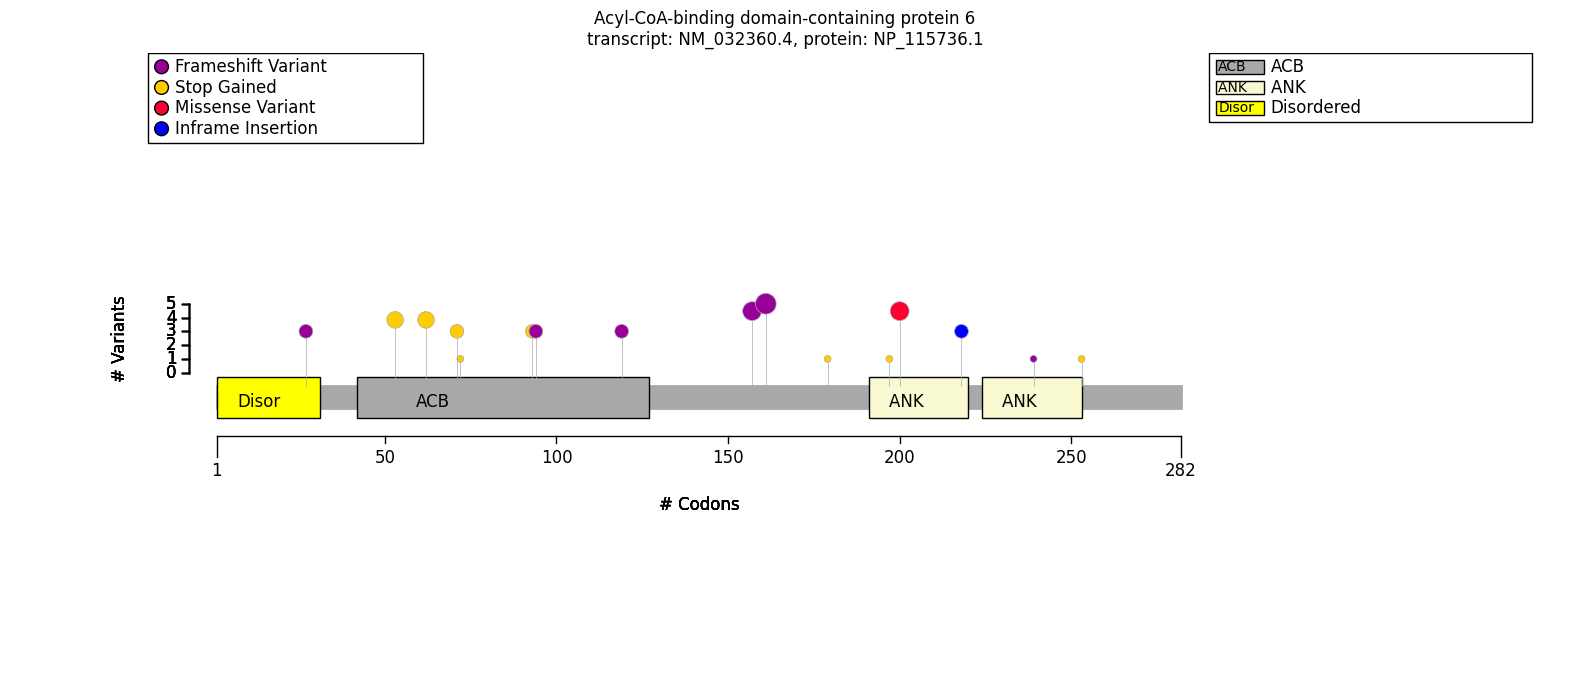

In [32]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis);

## Correlation Analysis

In [37]:
from gpsea.view import CohortViewable
cv = CohortViewable(hpo=hpo)
report = cv.process(cohort=cohort, transcript_id=ACBD6_MANE_transcript)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,45
Delayed speech and language development,HP:0000750,36
Ataxia,HP:0001251,33
Delayed ability to walk,HP:0031936,32
Stooped posture,HP:0025403,29
Lower limb spasticity,HP:0002061,27
Depressed nasal bridge,HP:0005280,24
Wide nose,HP:0000445,24
Thin upper lip vermilion,HP:0000219,23
Coarse facial features,HP:0000280,22


'\nanalysis_config = CohortAnalysisConfiguration()\nanalysis_config.missing_implies_excluded = False\n# TODO: Check HPO_observed_frequency \nanalysis_config.heuristic_strategy(threshold_HPO_observed_frequency=0.2)\nanalysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)\n'

In [39]:
from genophenocorr.model import FeatureType

# TODO: Check compare_by_variant_effect parameters and/or variables 
frameshift = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=ACBD6_MANE_transcript)
frameshift.summarize(hpo, PatientCategories.YES)

NameError: name 'analysis' is not defined

In [14]:
# TODO: Check compare_by_variant_key parameters and/or variables
feature = analysis.compare_by_variant_key(variant_key="12_114385521_114385521_C_T")
feature.summarize(hpo, PatientCategories.YES)

ZeroDivisionError: float division by zero

In [ ]:
# TODO: Check compare_by_variant_key parameters and/or variables
feature = analysis.compare_by_variant_key(variant_key="12_114401830_114401830_C_T")
feature.summarize(hpo, PatientCategories.YES)